In [323]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy.stats import pearsonr

In [324]:
import pingouin as pg

# Behav data

In [325]:
df_behav = pd.read_spss('Behav_OTPH_Responses.sav') 
df_behav = df_behav.drop([4]) # drop participant OTPH_5 because of recording problems 
df_behav.reset_index(drop=True, inplace=True)
df_behav.head(19)

,Gr1_Scale_1_0,Gr1_Scale_1_1,Gr1_Scale_1_2,Gr1_Scale_1_3,Gr1_Scale_1_4,Gr1_Scale_1_5,Gr1_Scale_1_6,Gr1_Scale_2_0,Gr1_Scale_2_1,Gr1_Scale_2_2,...,Gr1_Scale_3_early,Gr1_Scale_1_late,Gr1_Scale_2_late,Gr1_Scale_3_late,Gr2_Scale_1_early,Gr2_Scale_2_early,Gr2_Scale_3_early,Gr2_Scale_1_late,Gr2_Scale_2_late,Gr2_Scale_3_late
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,2.333333,2.666667,2.666667,2.333333,3.000000,2.666667,2.333333,2.666667,2.666667,2.333333
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.000000,2.666667,2.000000,3.000000,2.000000,2.333333,3.000000,2.666667,2.000000,3.000000
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.666667,3.666667,3.666667,3.000000,3.333333,3.666667,2.666667,3.666667,3.666667,3.000000
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,3.000000,1.000000,5.000000,3.000000,1.333333,5.000000,3.000000,1.000000,5.000000,3.000000
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.333333,4.000000,3.000000,3.000000,4.333333,3.333333,3.333333,4.000000,3.000000,3.000000
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
6,3.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,4.0,3.0,...,2.333333,1.000000,2.666667,2.000000,1.666667,3.333333,2.333333,1.000000,2.666667,2.000000
7,3.0,5.0,5.0,5.0,4.0,3.0,2.0,5.0,5.0,5.0,...,1.333333,3.000000,4.333333,1.333333,5.000000,5.000000,1.333333,3.000000,4.333333,1.333333
8,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,...,1.000000,2.666667,2.666667,1.000000,3.333333,2.333333,1.000000,2.666667,2.666667,1.000000
9,3.0,2.0,3.0,3.0,3.0,3.0,2.0,5.0,2.0,4.0,...,1.000000,2.666667,3.666667,1.000000,2.666667,3.333333,1.000000,2.666667,3.666667,1.000000


In [326]:
df_behav = df_behav.drop(['Gr1_Scale_1_early','Gr1_Scale_2_early','Gr1_Scale_3_early',
        'Gr1_Scale_1_late', 'Gr1_Scale_2_late', 'Gr1_Scale_3_late',
        'Gr2_Scale_1_early', 'Gr2_Scale_2_early', 'Gr2_Scale_3_early',
        'Gr2_Scale_1_late', 'Gr2_Scale_2_late', 'Gr2_Scale_3_late'], axis=1)
df_behav.head()

,Gr1_Scale_1_0,Gr1_Scale_1_1,Gr1_Scale_1_2,Gr1_Scale_1_3,Gr1_Scale_1_4,Gr1_Scale_1_5,Gr1_Scale_1_6,Gr1_Scale_2_0,Gr1_Scale_2_1,Gr1_Scale_2_2,...,Gr2_Scale_2_4,Gr2_Scale_2_5,Gr2_Scale_2_6,Gr2_Scale_3_0,Gr2_Scale_3_1,Gr2_Scale_3_2,Gr2_Scale_3_3,Gr2_Scale_3_4,Gr2_Scale_3_5,Gr2_Scale_3_6
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,5.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [327]:
df_behav = df_behav.rename(columns={'Gr1_Scale_1_0': 'Alertness_OT_baseline',
                    'Gr1_Scale_1_1': 'Alertness_OT_TP1',
                    'Gr1_Scale_1_2': 'Alertness_OT_TP2',
                    'Gr1_Scale_1_3': 'Alertness_OT_TP3',
                    'Gr1_Scale_1_4': 'Alertness_OT_TP4',
                    'Gr1_Scale_1_5': 'Alertness_OT_TP5',
                    'Gr1_Scale_1_6': 'Alertness_OT_TP6',
                    'Gr1_Scale_2_0': 'Excitement_OT_baseline',
                    'Gr1_Scale_2_1': 'Excitement_OT_TP1',
                    'Gr1_Scale_2_2': 'Excitement_OT_TP2',
                    'Gr1_Scale_2_3': 'Excitement_OT_TP3',
                    'Gr1_Scale_2_4': 'Excitement_OT_TP4',
                    'Gr1_Scale_2_5': 'Excitement_OT_TP5',
                    'Gr1_Scale_2_6': 'Excitement_OT_TP6',
                    'Gr1_Scale_3_0': 'Sociability_OT_baseline',
                    'Gr1_Scale_3_1': 'Sociability_OT_TP1',
                    'Gr1_Scale_3_2': 'Sociability_OT_TP2',
                    'Gr1_Scale_3_3': 'Sociability_OT_TP3',
                    'Gr1_Scale_3_4': 'Sociability_OT_TP4',
                    'Gr1_Scale_3_5': 'Sociability_OT_TP5',
                    'Gr1_Scale_3_6': 'Sociability_OT_TP6',
                    'Gr2_Scale_1_0': 'Alertness_PL_baseline',
                    'Gr2_Scale_1_1': 'Alertness_PL_TP1',
                    'Gr2_Scale_1_2': 'Alertness_PL_TP2',
                    'Gr2_Scale_1_3': 'Alertness_PL_TP3',
                    'Gr2_Scale_1_4': 'Alertness_PL_TP4',
                    'Gr2_Scale_1_5': 'Alertness_PL_TP5',
                    'Gr2_Scale_1_6': 'Alertness_PL_TP6',
                    'Gr2_Scale_2_0': 'Excitement_PL_baseline',
                    'Gr2_Scale_2_1': 'Excitement_PL_TP1',
                    'Gr2_Scale_2_2': 'Excitement_PL_TP2',
                    'Gr2_Scale_2_3': 'Excitement_PL_TP3',
                    'Gr2_Scale_2_4': 'Excitement_PL_TP4',
                    'Gr2_Scale_2_5': 'Excitement_PL_TP5',
                    'Gr2_Scale_2_6': 'Excitement_PL_TP6',
                    'Gr2_Scale_3_0': 'Sociability_PL_baseline',
                    'Gr2_Scale_3_1': 'Sociability_PL_TP1',
                    'Gr2_Scale_3_2': 'Sociability_PL_TP2',
                    'Gr2_Scale_3_3': 'Sociability_PL_TP3',
                    'Gr2_Scale_3_4': 'Sociability_PL_TP4',
                    'Gr2_Scale_3_5': 'Sociability_PL_TP5',
                    'Gr2_Scale_3_6': 'Sociability_PL_TP6'})

# Eyes open data 

In [328]:
df_eo = pd.read_csv('dat_EO_relPower.csv')
df_eo.head()

,id,Drug,TP,Theta,Alpha,Beta,Theta_base,Alpha_base,Beta_base,Unnamed: 9
0,1,1,1,1.226749,2.098225,0.667198,1.397564,1.806682,0.683265,NaN
1,1,1,2,1.223133,2.078042,0.678503,1.397564,1.806682,0.683265,NaN
2,1,1,3,1.308463,1.583226,0.727630,1.397564,1.806682,0.683265,NaN
3,1,1,4,1.372116,2.142114,0.641848,1.397564,1.806682,0.683265,
4,1,1,5,1.371725,2.163950,0.657213,1.397564,1.806682,0.683265,NaN


In [329]:
df_eo_baseline_OT = pd.DataFrame()
df_eo_baseline_OT['Alpha_OT_baseline'] = df_eo.query('Drug==1 & TP==1')['Alpha_base']
df_eo_baseline_OT['Beta_OT_baseline'] = df_eo.query('Drug==1 & TP==1')['Beta_base']
df_eo_baseline_OT['Theta_OT_baseline'] = df_eo.query('Drug==1 & TP==1')['Theta_base']
df_eo_baseline_OT.reset_index(drop=True, inplace=True)

df_eo_baseline_PL = pd.DataFrame()
df_eo_baseline_PL['Alpha_PL_baseline'] = df_eo.query('Drug==2 & TP==1')['Alpha_base']
df_eo_baseline_PL['Beta_PL_baseline'] = df_eo.query('Drug==2 & TP==1')['Beta_base']
df_eo_baseline_PL['Theta_PL_baseline'] = df_eo.query('Drug==2 & TP==1')['Theta_base']
df_eo_baseline_PL.reset_index(drop=True, inplace=True)

df_eo_TP1 = pd.DataFrame()
df_eo_TP1['Alpha_OT_TP1'] = df_eo.query('Drug==1 & TP==1')['Alpha']
df_eo_TP1['Beta_OT_TP1'] = df_eo.query('Drug==1 & TP==1')['Beta']
df_eo_TP1['Theta_OT_TP1'] = df_eo.query('Drug==1 & TP==1')['Theta']
df_eo_TP1.reset_index(drop=True, inplace=True)

df_eo_TP1_PL = pd.DataFrame()
df_eo_TP1_PL['Alpha_PL_TP1'] = df_eo.query('Drug==2 & TP==1')['Alpha']
df_eo_TP1_PL['Beta_PL_TP1'] = df_eo.query('Drug==2 & TP==1')['Beta']
df_eo_TP1_PL['Theta_PL_TP1'] = df_eo.query('Drug==2 & TP==1')['Theta']
df_eo_TP1_PL.reset_index(drop=True, inplace=True)

df_eo_TP2 = pd.DataFrame()
df_eo_TP2['Alpha_OT_TP2'] = df_eo.query('Drug==1 & TP==2')['Alpha']
df_eo_TP2['Beta_OT_TP2'] = df_eo.query('Drug==1 & TP==2')['Beta']
df_eo_TP2['Theta_OT_TP2'] = df_eo.query('Drug==1 & TP==2')['Theta']
df_eo_TP2.reset_index(drop=True, inplace=True)

df_eo_TP2_PL = pd.DataFrame()
df_eo_TP2_PL['Alpha_PL_TP2'] = df_eo.query('Drug==2 & TP==2')['Alpha']
df_eo_TP2_PL['Beta_PL_TP2'] = df_eo.query('Drug==2 & TP==2')['Beta']
df_eo_TP2_PL['Theta_PL_TP2'] = df_eo.query('Drug==2 & TP==2')['Theta']
df_eo_TP2_PL.reset_index(drop=True, inplace=True)

df_eo_TP3 = pd.DataFrame()
df_eo_TP3['Alpha_OT_TP3'] = df_eo.query('Drug==1 & TP==3')['Alpha']
df_eo_TP3['Beta_OT_TP3'] = df_eo.query('Drug==1 & TP==3')['Beta']
df_eo_TP3['Theta_OT_TP3'] = df_eo.query('Drug==1 & TP==3')['Theta']
df_eo_TP3.reset_index(drop=True, inplace=True)

df_eo_TP3_PL = pd.DataFrame()
df_eo_TP3_PL['Alpha_PL_TP3'] = df_eo.query('Drug==2 & TP==3')['Alpha']
df_eo_TP3_PL['Beta_PL_TP3'] = df_eo.query('Drug==2 & TP==3')['Beta']
df_eo_TP3_PL['Theta_PL_TP3'] = df_eo.query('Drug==2 & TP==3')['Theta']
df_eo_TP3_PL.reset_index(drop=True, inplace=True)

df_eo_TP4 = pd.DataFrame()
df_eo_TP4['Alpha_OT_TP4'] = df_eo.query('Drug==1 & TP==4')['Alpha']
df_eo_TP4['Beta_OT_TP4'] = df_eo.query('Drug==1 & TP==4')['Beta']
df_eo_TP4['Theta_OT_TP4'] = df_eo.query('Drug==1 & TP==4')['Theta']
df_eo_TP4.reset_index(drop=True, inplace=True)

df_eo_TP4_PL = pd.DataFrame()
df_eo_TP4_PL['Alpha_PL_TP4'] = df_eo.query('Drug==2 & TP==4')['Alpha']
df_eo_TP4_PL['Beta_PL_TP4'] = df_eo.query('Drug==2 & TP==4')['Beta']
df_eo_TP4_PL['Theta_PL_TP4'] = df_eo.query('Drug==2 & TP==4')['Theta']
df_eo_TP4_PL.reset_index(drop=True, inplace=True)

df_eo_TP5 = pd.DataFrame()
df_eo_TP5['Alpha_OT_TP5'] = df_eo.query('Drug==1 & TP==5')['Alpha']
df_eo_TP5['Beta_OT_TP5'] = df_eo.query('Drug==1 & TP==5')['Beta']
df_eo_TP5['Theta_OT_TP5'] = df_eo.query('Drug==1 & TP==5')['Theta']
df_eo_TP5.reset_index(drop=True, inplace=True)

df_eo_TP5_PL = pd.DataFrame()
df_eo_TP5_PL['Alpha_PL_TP5'] = df_eo.query('Drug==2 & TP==5')['Alpha']
df_eo_TP5_PL['Beta_PL_TP5'] = df_eo.query('Drug==2 & TP==5')['Beta']
df_eo_TP5_PL['Theta_PL_TP5'] = df_eo.query('Drug==2 & TP==5')['Theta']
df_eo_TP5_PL.reset_index(drop=True, inplace=True)

df_eo_TP6 = pd.DataFrame()
df_eo_TP6['Alpha_OT_TP6'] = df_eo.query('Drug==1 & TP==6')['Alpha']
df_eo_TP6['Beta_OT_TP6'] = df_eo.query('Drug==1 & TP==6')['Beta']
df_eo_TP6['Theta_OT_TP6'] = df_eo.query('Drug==1 & TP==6')['Theta']
df_eo_TP6.reset_index(drop=True, inplace=True)

df_eo_TP6_PL = pd.DataFrame()
df_eo_TP6_PL['Alpha_PL_TP6'] = df_eo.query('Drug==2 & TP==6')['Alpha']
df_eo_TP6_PL['Beta_PL_TP6'] = df_eo.query('Drug==2 & TP==6')['Beta']
df_eo_TP6_PL['Theta_PL_TP6'] = df_eo.query('Drug==2 & TP==6')['Theta']
df_eo_TP6_PL.reset_index(drop=True, inplace=True)

In [330]:
df_eo_main = df_eo_baseline_OT.join(df_eo_baseline_PL)
df_eo_main = df_eo_main.join(df_eo_TP1)
df_eo_main = df_eo_main.join(df_eo_TP1_PL)
df_eo_main = df_eo_main.join(df_eo_TP2)
df_eo_main = df_eo_main.join(df_eo_TP2_PL)
df_eo_main = df_eo_main.join(df_eo_TP3)
df_eo_main = df_eo_main.join(df_eo_TP3_PL)
df_eo_main = df_eo_main.join(df_eo_TP4)
df_eo_main = df_eo_main.join(df_eo_TP4_PL)
df_eo_main = df_eo_main.join(df_eo_TP5)
df_eo_main = df_eo_main.join(df_eo_TP5_PL)
df_eo_main = df_eo_main.join(df_eo_TP6)
df_eo_main = df_eo_main.join(df_eo_TP6_PL)

In [331]:
df_eo_main.head()

,Alpha_OT_baseline,Beta_OT_baseline,Theta_OT_baseline,Alpha_PL_baseline,Beta_PL_baseline,Theta_PL_baseline,Alpha_OT_TP1,Beta_OT_TP1,Theta_OT_TP1,Alpha_PL_TP1,...,Theta_OT_TP5,Alpha_PL_TP5,Beta_PL_TP5,Theta_PL_TP5,Alpha_OT_TP6,Beta_OT_TP6,Theta_OT_TP6,Alpha_PL_TP6,Beta_PL_TP6,Theta_PL_TP6
0,1.806682,0.683265,1.397564,2.731957,0.636147,1.180703,2.098225,0.667198,1.226749,2.885148,...,1.371725,2.640344,0.641101,1.281785,2.104528,0.689615,1.182950,2.992360,0.625986,1.118693
1,2.238219,0.593412,1.636931,2.751071,0.507468,1.354817,2.499173,0.559997,1.540498,2.789433,...,1.510186,2.769164,0.527295,1.428142,2.527657,0.561062,1.553071,2.770109,0.522265,1.457623
2,2.150573,0.644745,1.337230,2.732490,0.629835,1.260243,1.933899,0.626944,1.330949,2.721984,...,1.189855,2.686977,0.605182,1.280903,2.513749,0.657572,1.055989,2.624962,0.600400,1.348108
3,1.154408,0.684087,1.818370,2.720190,0.480063,1.212259,1.178417,0.630595,1.896542,2.823591,...,1.947654,2.809108,0.481947,1.205705,1.150032,0.640439,1.905159,2.894763,0.484195,1.190631
4,1.595006,0.711019,1.573143,2.043225,0.582666,1.872206,1.271831,0.706092,1.507242,2.101857,...,1.713256,1.974045,0.564606,1.877176,1.814460,0.683339,1.644718,2.040060,0.577669,1.728657


# Amplitude-amplitude eyes open only

In [332]:
df_eo_aac = pd.read_csv('dat_Rho_lmm_EO_Pearson.csv')
df_eo_aac.head()

,id,Drug,TP,theta_alpha,theta_beta,alpha_beta,theta_alpha_base,theta_beta_base,alpha_beta_base
0,1,1,1,0.394704,-0.488335,-0.574766,0.238061,0.001296,-0.274539
1,1,1,2,0.229104,-0.321698,-0.264151,0.238061,0.001296,-0.274539
2,1,1,3,0.190941,-0.419300,-0.572240,0.238061,0.001296,-0.274539
3,1,1,4,0.398028,-0.382952,-0.610947,0.238061,0.001296,-0.274539
4,1,1,5,0.146503,-0.053833,-0.353213,0.238061,0.001296,-0.274539


In [333]:
df_eo_aac_baseline_OT = pd.DataFrame()
df_eo_aac_baseline_OT['Alpha_beta_OT_baseline'] = df_eo_aac.query('Drug==1 & TP==1')['alpha_beta_base']
df_eo_aac_baseline_OT['Theta_alpha_OT_baseline'] = df_eo_aac.query('Drug==1 & TP==1')['theta_alpha_base']
df_eo_aac_baseline_OT['Theta_beta_OT_baseline'] = df_eo_aac.query('Drug==1 & TP==1')['theta_beta_base']
df_eo_aac_baseline_OT.reset_index(drop=True, inplace=True)

df_eo_aac_baseline_PL = pd.DataFrame()
df_eo_aac_baseline_PL['Alpha_beta_PL_baseline'] = df_eo_aac.query('Drug==2 & TP==1')['alpha_beta_base']
df_eo_aac_baseline_PL['Theta_alpha_PL_baseline'] = df_eo_aac.query('Drug==2 & TP==1')['theta_alpha_base']
df_eo_aac_baseline_PL['Theta_beta_PL_baseline'] = df_eo_aac.query('Drug==2 & TP==1')['theta_beta_base']
df_eo_aac_baseline_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP1 = pd.DataFrame()
df_eo_aac_TP1['Alpha_beta_OT_TP1'] = df_eo_aac.query('Drug==1 & TP==1')['alpha_beta']
df_eo_aac_TP1['Theta_alpha_OT_TP1'] = df_eo_aac.query('Drug==1 & TP==1')['theta_alpha']
df_eo_aac_TP1['Theta_beta_OT_TP1'] = df_eo_aac.query('Drug==1 & TP==1')['theta_beta']
df_eo_aac_TP1.reset_index(drop=True, inplace=True)

df_eo_aac_TP1_PL = pd.DataFrame()
df_eo_aac_TP1_PL['Alpha_beta_PL_TP1'] = df_eo_aac.query('Drug==2 & TP==1')['alpha_beta']
df_eo_aac_TP1_PL['Theta_alpha_PL_TP1'] = df_eo_aac.query('Drug==2 & TP==1')['theta_alpha']
df_eo_aac_TP1_PL['Theta_beta_PL_TP1'] = df_eo_aac.query('Drug==2 & TP==1')['theta_beta']
df_eo_aac_TP1_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP2 = pd.DataFrame()
df_eo_aac_TP2['Alpha_beta_OT_TP2'] = df_eo_aac.query('Drug==1 & TP==2')['alpha_beta']
df_eo_aac_TP2['Theta_alpha_OT_TP2'] = df_eo_aac.query('Drug==1 & TP==2')['theta_alpha']
df_eo_aac_TP2['Theta_beta_OT_TP2'] = df_eo_aac.query('Drug==1 & TP==2')['theta_beta']
df_eo_aac_TP2.reset_index(drop=True, inplace=True)

df_eo_aac_TP2_PL = pd.DataFrame()
df_eo_aac_TP2_PL['Alpha_beta_PL_TP2'] = df_eo_aac.query('Drug==2 & TP==2')['alpha_beta']
df_eo_aac_TP2_PL['Theta_alpha_PL_TP2'] = df_eo_aac.query('Drug==2 & TP==2')['theta_alpha']
df_eo_aac_TP2_PL['Theta_beta_PL_TP2'] = df_eo_aac.query('Drug==2 & TP==2')['theta_beta']
df_eo_aac_TP2_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP3 = pd.DataFrame()
df_eo_aac_TP3['Alpha_beta_OT_TP3'] = df_eo_aac.query('Drug==1 & TP==3')['alpha_beta']
df_eo_aac_TP3['Theta_alpha_OT_TP3'] = df_eo_aac.query('Drug==1 & TP==3')['theta_alpha']
df_eo_aac_TP3['Theta_beta_OT_TP3'] = df_eo_aac.query('Drug==1 & TP==3')['theta_beta']
df_eo_aac_TP3.reset_index(drop=True, inplace=True)

df_eo_aac_TP3_PL = pd.DataFrame()
df_eo_aac_TP3_PL['Alpha_beta_PL_TP3'] = df_eo_aac.query('Drug==2 & TP==3')['alpha_beta']
df_eo_aac_TP3_PL['Theta_alpha_PL_TP3'] = df_eo_aac.query('Drug==2 & TP==3')['theta_alpha']
df_eo_aac_TP3_PL['Theta_beta_PL_TP3'] = df_eo_aac.query('Drug==2 & TP==3')['theta_beta']
df_eo_aac_TP3_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP4 = pd.DataFrame()
df_eo_aac_TP4['Alpha_beta_OT_TP4'] = df_eo_aac.query('Drug==1 & TP==4')['alpha_beta']
df_eo_aac_TP4['Theta_alpha_OT_TP4'] = df_eo_aac.query('Drug==1 & TP==4')['theta_alpha']
df_eo_aac_TP4['Theta_beta_OT_TP4'] = df_eo_aac.query('Drug==1 & TP==4')['theta_beta']
df_eo_aac_TP4.reset_index(drop=True, inplace=True)

df_eo_aac_TP4_PL = pd.DataFrame()
df_eo_aac_TP4_PL['Alpha_beta_PL_TP4'] = df_eo_aac.query('Drug==2 & TP==4')['alpha_beta']
df_eo_aac_TP4_PL['Theta_alpha_PL_TP4'] = df_eo_aac.query('Drug==2 & TP==4')['theta_alpha']
df_eo_aac_TP4_PL['Theta_beta_PL_TP4'] = df_eo_aac.query('Drug==2 & TP==4')['theta_beta']
df_eo_aac_TP4_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP5 = pd.DataFrame()
df_eo_aac_TP5['Alpha_beta_OT_TP5'] = df_eo_aac.query('Drug==1 & TP==5')['alpha_beta']
df_eo_aac_TP5['Theta_alpha_OT_TP5'] = df_eo_aac.query('Drug==1 & TP==5')['theta_alpha']
df_eo_aac_TP5['Theta_beta_OT_TP5'] = df_eo_aac.query('Drug==1 & TP==5')['theta_beta']
df_eo_aac_TP5.reset_index(drop=True, inplace=True)

df_eo_aac_TP5_PL = pd.DataFrame()
df_eo_aac_TP5_PL['Alpha_beta_PL_TP5'] = df_eo_aac.query('Drug==2 & TP==5')['alpha_beta']
df_eo_aac_TP5_PL['Theta_alpha_PL_TP5'] = df_eo_aac.query('Drug==2 & TP==5')['theta_alpha']
df_eo_aac_TP5_PL['Theta_beta_PL_TP5'] = df_eo_aac.query('Drug==2 & TP==5')['theta_beta']
df_eo_aac_TP5_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP6 = pd.DataFrame()
df_eo_aac_TP6['Alpha_beta_OT_TP6'] = df_eo_aac.query('Drug==1 & TP==6')['alpha_beta']
df_eo_aac_TP6['Theta_alpha_OT_TP6'] = df_eo_aac.query('Drug==1 & TP==6')['theta_alpha']
df_eo_aac_TP6['Theta_beta_OT_TP6'] = df_eo_aac.query('Drug==1 & TP==6')['theta_beta']
df_eo_aac_TP6.reset_index(drop=True, inplace=True)

df_eo_aac_TP6_PL = pd.DataFrame()
df_eo_aac_TP6_PL['Alpha_beta_PL_TP6'] = df_eo_aac.query('Drug==2 & TP==6')['alpha_beta']
df_eo_aac_TP6_PL['Theta_alpha_PL_TP6'] = df_eo_aac.query('Drug==2 & TP==6')['theta_alpha']
df_eo_aac_TP6_PL['Theta_beta_PL_TP6'] = df_eo_aac.query('Drug==2 & TP==6')['theta_beta']
df_eo_aac_TP6_PL.reset_index(drop=True, inplace=True)

In [334]:
df_eo_aac_main = df_eo_aac_baseline_OT.join(df_eo_aac_baseline_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP1)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP1_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP2)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP2_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP3)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP3_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP4)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP4_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP5)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP5_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP6)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP6_PL)

In [335]:
df_eo_aac_main.head()

,Alpha_beta_OT_baseline,Theta_alpha_OT_baseline,Theta_beta_OT_baseline,Alpha_beta_PL_baseline,Theta_alpha_PL_baseline,Theta_beta_PL_baseline,Alpha_beta_OT_TP1,Theta_alpha_OT_TP1,Theta_beta_OT_TP1,Alpha_beta_PL_TP1,...,Theta_beta_OT_TP5,Alpha_beta_PL_TP5,Theta_alpha_PL_TP5,Theta_beta_PL_TP5,Alpha_beta_OT_TP6,Theta_alpha_OT_TP6,Theta_beta_OT_TP6,Alpha_beta_PL_TP6,Theta_alpha_PL_TP6,Theta_beta_PL_TP6
0,-0.274539,0.238061,0.001296,-0.132697,-0.524658,-0.001657,-0.574766,0.394704,-0.488335,-0.683519,...,-0.053833,-0.618422,-0.529814,0.349901,-0.514903,0.187303,-0.536834,-0.266523,-0.328786,0.135262
1,-0.000599,-0.190502,-0.097886,-0.246229,-0.287418,-0.195272,0.043692,-0.099015,-0.294738,-0.514130,...,-0.124666,-0.164425,-0.270034,-0.168014,-0.362033,-0.307066,-0.026161,-0.751499,-0.192304,0.085663
2,0.005307,-0.492094,-0.508485,-0.488327,-0.430249,0.128645,0.336195,-0.486931,-0.735647,-0.550173,...,-0.747517,-0.402257,-0.263890,-0.460187,-0.293089,-0.017712,-0.443097,-0.639478,0.229856,-0.314533
3,-0.167116,-0.037862,-0.442393,-0.061400,-0.256385,-0.306878,-0.010206,0.093221,-0.354274,-0.023952,...,-0.391357,-0.414783,-0.461671,0.208721,-0.154817,0.088987,-0.468784,-0.449096,-0.285127,-0.042444
4,0.084291,-0.017950,-0.317972,0.087444,-0.146895,-0.561328,0.296252,-0.039727,-0.019008,-0.331127,...,-0.274656,0.187411,-0.631100,-0.634126,-0.099165,-0.123096,-0.275531,-0.166759,-0.453189,-0.279137


# Correlations

In [336]:
df_behav.head()

,Alertness_OT_baseline,Alertness_OT_TP1,Alertness_OT_TP2,Alertness_OT_TP3,Alertness_OT_TP4,Alertness_OT_TP5,Alertness_OT_TP6,Excitement_OT_baseline,Excitement_OT_TP1,Excitement_OT_TP2,...,Excitement_PL_TP4,Excitement_PL_TP5,Excitement_PL_TP6,Sociability_PL_baseline,Sociability_PL_TP1,Sociability_PL_TP2,Sociability_PL_TP3,Sociability_PL_TP4,Sociability_PL_TP5,Sociability_PL_TP6
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,5.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [337]:
df_behav.shape

(19, 42)

In [338]:
df_behav['Alertness_OT_TP1']

0     3.0
1     2.0
2     3.0
3     1.0
4     5.0
5     5.0
6     2.0
7     5.0
8     3.0
9     2.0
10    4.0
11    3.0
12    5.0
13    3.0
14    4.0
15    5.0
16    2.0
17    4.0
18    2.0
Name: Alertness_OT_TP1, dtype: float64

In [339]:
df_eo_main['Alpha_OT_TP1']

0     2.098225
1     2.499173
2     1.933899
3     1.178417
4     1.271831
5     1.610746
6     2.531177
7     2.428165
8     2.091353
9     2.835651
10    2.416179
11    2.750388
12    2.929492
13    2.117132
14    1.510175
15    1.524462
16    2.459277
17    1.886088
18    1.606906
Name: Alpha_OT_TP1, dtype: float64

### We need (all EO):
- Theta[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Alpha[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Beta[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Theta-alpha[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Alpha-beta[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]

### Some more cleanup - remove missing values

In [340]:
df_behav['Alertness_OT_TP4']

0     3.0
1     2.0
2     4.0
3     1.0
4     5.0
5     5.0
6     1.0
7     4.0
8     2.0
9     3.0
10    3.0
11    2.0
12    5.0
13    3.0
14    2.0
15    5.0
16    4.0
17    3.0
18    2.0
Name: Alertness_OT_TP4, dtype: float64

In [341]:
df_eo_main['Theta_OT_TP4']

0     1.372116
1     1.541791
2     1.524052
3     1.850233
4     1.606460
5     1.224348
6     1.456364
7     1.470762
8     1.968194
9     1.122462
10    1.387081
11    1.257508
12    1.138354
13    1.871171
14    1.608134
15    1.418431
16    1.756036
17    1.123983
18         NaN
Name: Theta_OT_TP4, dtype: float64

In [342]:
# none of the behav values are nan/null:
df_behav.isnull().any().any()

False

In [343]:
df_eo_main.isnull()

,Alpha_OT_baseline,Beta_OT_baseline,Theta_OT_baseline,Alpha_PL_baseline,Beta_PL_baseline,Theta_PL_baseline,Alpha_OT_TP1,Beta_OT_TP1,Theta_OT_TP1,Alpha_PL_TP1,...,Theta_OT_TP5,Alpha_PL_TP5,Beta_PL_TP5,Theta_PL_TP5,Alpha_OT_TP6,Beta_OT_TP6,Theta_OT_TP6,Alpha_PL_TP6,Beta_PL_TP6,Theta_PL_TP6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 1. Alertness

In [344]:
# create a mini df
df_temp = pd.DataFrame()
df_temp['Alertness_OT_TP4'] = df_behav['Alertness_OT_TP4']
df_temp['Theta_OT_TP4'] = df_eo_main['Theta_OT_TP4']
df_temp

,Alertness_OT_TP4,Theta_OT_TP4
0,3.0,1.372116
1,2.0,1.541791
2,4.0,1.524052
3,1.0,1.850233
4,5.0,1.606460
5,5.0,1.224348
6,1.0,1.456364
7,4.0,1.470762
8,2.0,1.968194
9,3.0,1.122462


In [345]:
df_temp.dropna()

,Alertness_OT_TP4,Theta_OT_TP4
0,3.0,1.372116
1,2.0,1.541791
2,4.0,1.524052
3,1.0,1.850233
4,5.0,1.606460
5,5.0,1.224348
6,1.0,1.456364
7,4.0,1.470762
8,2.0,1.968194
9,3.0,1.122462


In [346]:
# Individual TF
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    print('\n' + behav_measure)
    for tf_measure in ['Theta_', 'Alpha_', 'Beta_']:
        print('\n' + tf_measure)
        for tp in ['1','2','3','4','5','6']:
            print('\nTP = ' + tp)
            for drug in ['OT','PL']:
                print('Drug = ' + drug)
                behav_id = behav_measure + drug + '_TP' + tp
                eo_main_id = tf_measure + drug + '_TP' + tp
                # doing this to treat nan values:
                # first create a mini temp df
                df_temp = pd.DataFrame()
                df_temp[behav_id] = df_behav[behav_id]
                df_temp[eo_main_id] = df_eo_main[eo_main_id]
                # then remove nan from here
                df_temp = df_temp.dropna()
                # now do the corr between the columns in the temp df
                print(np.corrcoef(df_temp[behav_id].to_numpy(), df_temp[eo_main_id].to_numpy())[0][1])


Alertness_

Theta_

TP = 1
Drug = OT
-0.3347093939465523
Drug = PL
0.544126902605591

TP = 2
Drug = OT
-0.21584163281897067
Drug = PL
0.31372162657245406

TP = 3
Drug = OT
-0.13478589964080642
Drug = PL
0.23151173075425024

TP = 4
Drug = OT
-0.3224161989867379
Drug = PL
0.3421494353557864

TP = 5
Drug = OT
-0.3410721501470394
Drug = PL
0.3091211439879467

TP = 6
Drug = OT
-0.1706024026950118
Drug = PL
0.20547534667385225

Alpha_

TP = 1
Drug = OT
-0.11919851931906952
Drug = PL
-0.2061956172117453

TP = 2
Drug = OT
-0.060414042782887784
Drug = PL
-0.03027121994271983

TP = 3
Drug = OT
-0.16167555296333308
Drug = PL
-0.0841553273286048

TP = 4
Drug = OT
-0.005452213909472359
Drug = PL
-0.10690495345671733

TP = 5
Drug = OT
0.11109970750792691
Drug = PL
0.0024498492662043195

TP = 6
Drug = OT
0.12484930735203012
Drug = PL
0.40262370788960894

Beta_

TP = 1
Drug = OT
0.1820036463657361
Drug = PL
-0.3103083844945187

TP = 2
Drug = OT
0.10709201254653729
Drug = PL
-0.03732060295687032

TP =

In [347]:
# Cross-Frequency ACC
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    print('\n' + behav_measure)
    for tf_measure in ['Theta_alpha_', 'Alpha_beta_']:
        print('\n' + tf_measure)
        for tp in ['1','2','3','4','5','6']:
            print('\nTP = ' + tp)
            for drug in ['OT','PL']:
                print('Drug = ' + drug)
                behav_id = behav_measure + drug + '_TP' + tp
                eo_main_id = tf_measure + drug + '_TP' + tp
                # doing this to treat nan values:
                # first create a mini temp df
                df_temp = pd.DataFrame()
                df_temp[behav_id] = df_behav[behav_id]
                df_temp[eo_main_id] = df_eo_aac_main[eo_main_id]
                # then remove nan from here
                df_temp = df_temp.dropna()
                # now do the corr between the columns in the temp df
                print(np.corrcoef(df_temp[behav_id].to_numpy(), df_temp[eo_main_id].to_numpy())[0][1])


Alertness_

Theta_alpha_

TP = 1
Drug = OT
-0.3350420207919333
Drug = PL
-0.02788688422316058

TP = 2
Drug = OT
-0.16338662551514607
Drug = PL
0.16851657665622222

TP = 3
Drug = OT
0.09965548742009414
Drug = PL
-0.2978285296333242

TP = 4
Drug = OT
-0.0019713965112350992
Drug = PL
-0.3922879210457479

TP = 5
Drug = OT
0.41977108026887505
Drug = PL
-0.263753193348863

TP = 6
Drug = OT
-0.2967126533879325
Drug = PL
0.02265332229664223

Alpha_beta_

TP = 1
Drug = OT
0.10757812901261928
Drug = PL
-0.14190107658937978

TP = 2
Drug = OT
0.2786010564063633
Drug = PL
-0.19911345689173834

TP = 3
Drug = OT
0.07956861834018329
Drug = PL
0.1887823906241206

TP = 4
Drug = OT
-0.07845835664943096
Drug = PL
0.17395613538917695

TP = 5
Drug = OT
-0.10160293846709692
Drug = PL
-0.05184048895408948

TP = 6
Drug = OT
0.33678249932636434
Drug = PL
-0.08781749354378425

Excitement_

Theta_alpha_

TP = 1
Drug = OT
-0.27936378911557386
Drug = PL
-0.3379627783881964

TP = 2
Drug = OT
-0.15562186877064238
Dr

# Regressions

In [348]:
# only looking at TP1; alertness

In [349]:
df_behav.head()

,Alertness_OT_baseline,Alertness_OT_TP1,Alertness_OT_TP2,Alertness_OT_TP3,Alertness_OT_TP4,Alertness_OT_TP5,Alertness_OT_TP6,Excitement_OT_baseline,Excitement_OT_TP1,Excitement_OT_TP2,...,Excitement_PL_TP4,Excitement_PL_TP5,Excitement_PL_TP6,Sociability_PL_baseline,Sociability_PL_TP1,Sociability_PL_TP2,Sociability_PL_TP3,Sociability_PL_TP4,Sociability_PL_TP5,Sociability_PL_TP6
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,5.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [350]:
df_eo_aac_main.head()

,Alpha_beta_OT_baseline,Theta_alpha_OT_baseline,Theta_beta_OT_baseline,Alpha_beta_PL_baseline,Theta_alpha_PL_baseline,Theta_beta_PL_baseline,Alpha_beta_OT_TP1,Theta_alpha_OT_TP1,Theta_beta_OT_TP1,Alpha_beta_PL_TP1,...,Theta_beta_OT_TP5,Alpha_beta_PL_TP5,Theta_alpha_PL_TP5,Theta_beta_PL_TP5,Alpha_beta_OT_TP6,Theta_alpha_OT_TP6,Theta_beta_OT_TP6,Alpha_beta_PL_TP6,Theta_alpha_PL_TP6,Theta_beta_PL_TP6
0,-0.274539,0.238061,0.001296,-0.132697,-0.524658,-0.001657,-0.574766,0.394704,-0.488335,-0.683519,...,-0.053833,-0.618422,-0.529814,0.349901,-0.514903,0.187303,-0.536834,-0.266523,-0.328786,0.135262
1,-0.000599,-0.190502,-0.097886,-0.246229,-0.287418,-0.195272,0.043692,-0.099015,-0.294738,-0.514130,...,-0.124666,-0.164425,-0.270034,-0.168014,-0.362033,-0.307066,-0.026161,-0.751499,-0.192304,0.085663
2,0.005307,-0.492094,-0.508485,-0.488327,-0.430249,0.128645,0.336195,-0.486931,-0.735647,-0.550173,...,-0.747517,-0.402257,-0.263890,-0.460187,-0.293089,-0.017712,-0.443097,-0.639478,0.229856,-0.314533
3,-0.167116,-0.037862,-0.442393,-0.061400,-0.256385,-0.306878,-0.010206,0.093221,-0.354274,-0.023952,...,-0.391357,-0.414783,-0.461671,0.208721,-0.154817,0.088987,-0.468784,-0.449096,-0.285127,-0.042444
4,0.084291,-0.017950,-0.317972,0.087444,-0.146895,-0.561328,0.296252,-0.039727,-0.019008,-0.331127,...,-0.274656,0.187411,-0.631100,-0.634126,-0.099165,-0.123096,-0.275531,-0.166759,-0.453189,-0.279137


## Preprocessing dataframes

In [351]:
def prep_data2(dataframe):
    print('!!! we are assuming 1 is OT')
    # creating two copiues of dataframe, to manipulate the OT values and to manipulate the PL values
    mydfnew_OT = dataframe.copy(deep=True)
    mydfnew_PL = dataframe.copy(deep=True)
    df_rows = mydfnew_OT.shape[0]
    mydfnew_OT = mydfnew_OT.assign(Drug=[1]*df_rows)
    mydfnew_PL = mydfnew_PL.assign(Drug=[2]*df_rows)

    cols_original = []
    bsl_change = {}
    for c in mydfnew_OT.columns:
        if 'baseline' in c:
            bsl_change[c] = c[:-8]+'BSL'
    # rename baselinacols in ot and pl dataframes
    mydfnew_OT.rename(columns=bsl_change, inplace=True)    
    mydfnew_PL.rename(columns=bsl_change, inplace=True)    
    
    # list and dicts of columns
    cols_bl = []
    cols_pl = []
    cols_ot = []
    dict_pl = {}
    dict_ot = {}
    for c in mydfnew_OT.columns:
        if 'PL' in c:
            cols_pl.append(c)
            dict_pl[c] = c[:-7]+ c[-4:]
        elif 'OT' in c:
            cols_ot.append(c)
            dict_ot[c] = c[:-7]+ c[-4:] 
    
    # drop pl columns in OT df, ot columns in PL df
    mydfnew_OT = mydfnew_OT.drop(columns = cols_pl)
    mydfnew_PL = mydfnew_PL.drop(columns = cols_ot)
    
    # rename cols in ot and pl dataframes
    mydfnew_OT.rename(columns=dict_ot, inplace=True)    
    mydfnew_PL.rename(columns=dict_pl, inplace=True)  

    mynewdf = pd.concat([mydfnew_OT, mydfnew_PL])

    return(mynewdf) 
    

def prep_data(dataframe):
    print('!!! we are assuming 1 is OT')
    # creating two copiues of dataframe, to manipulate the OT values and to manipulate the PL values
    mydfnew_OT = dataframe.copy(deep=True)
    mydfnew_PL = dataframe.copy(deep=True)
    df_rows = mydfnew_OT.shape[0]
    mydfnew_OT = mydfnew_OT.assign(Drug=[1]*df_rows)
    mydfnew_PL = mydfnew_PL.assign(Drug=[2]*df_rows)
    # list and dicts of columns
    cols_original = []
    cols_bl = []
    cols_pl = []
    cols_ot = []
    dict_pl = {}
    dict_ot = {}
    for c in mydfnew_OT.columns:
        cols_original.append(c) 
        if 'baseline' in c:
            cols_bl.append(c)
        else:
            if 'PL' in c:
                cols_pl.append(c)
                dict_pl[c] = c[:-7]+ c[-4:]
            if 'OT' in c:
                cols_ot.append(c)
                dict_ot[c] = c[:-7]+ c[-4:] 
                
    # only interested in TP1-TP6, so drop baseline
    mydfnew_OT = mydfnew_OT.drop(columns = cols_bl)
    mydfnew_PL = mydfnew_PL.drop(columns = cols_bl)
    
    # drop pl columns in OT df, ot columns in PL df
    mydfnew_OT = mydfnew_OT.drop(columns = cols_pl)
    mydfnew_PL = mydfnew_PL.drop(columns = cols_ot)
    
    # rename cols in ot and pl dataframes
    mydfnew_OT.rename(columns=dict_ot, inplace=True)    
    mydfnew_PL.rename(columns=dict_pl, inplace=True)  

    mynewdf = pd.concat([mydfnew_OT, mydfnew_PL])

    return(mynewdf) 

In [352]:
mynewdf_behav = prep_data(df_behav)
mynewdf_tf = prep_data(df_eo_aac_main)

!!! we are assuming 1 is OT
!!! we are assuming 1 is OT


In [353]:
print(mynewdf_tf.head())

   Alpha_beta_TP1  Theta_alpha_TP1  Theta_beta_TP1  Alpha_beta_TP2  \
0       -0.574766         0.394704       -0.488335       -0.264151   
1        0.043692        -0.099015       -0.294738       -0.270954   
2        0.336195        -0.486931       -0.735647        0.329320   
3       -0.010206         0.093221       -0.354274       -0.041456   
4        0.296252        -0.039727       -0.019008       -0.359467   

   Theta_alpha_TP2  Theta_beta_TP2  Alpha_beta_TP3  Theta_alpha_TP3  \
0         0.229104       -0.321698       -0.572240         0.190941   
1         0.131743       -0.264146       -0.145607        -0.303610   
2        -0.607788       -0.656180        0.167715        -0.629681   
3        -0.251551       -0.011032        0.156506        -0.022857   
4        -0.297763       -0.050941       -0.335226        -0.192292   

   Theta_beta_TP3  Alpha_beta_TP4  Theta_alpha_TP4  Theta_beta_TP4  \
0       -0.419300       -0.610947         0.398028       -0.382952   
1       -0.1

In [354]:
# first concat them
print(df_behav.shape)
print(df_eo_aac_main.shape)
df_middlemain = pd.concat([df_behav, df_eo_aac_main], axis = 1)
df_main = pd.concat([df_middlemain, df_eo_main], axis = 1)
print(df_main.shape)

(19, 42)
(19, 42)
(19, 126)


In [355]:
mynewdf_main = prep_data2(df_main)
mynewdf_main.shape

!!! we are assuming 1 is OT


(38, 64)

In [356]:
mynewdf_main.columns

Index(['Alertness_BSL', 'Alertness_TP1', 'Alertness_TP2', 'Alertness_TP3',
       'Alertness_TP4', 'Alertness_TP5', 'Alertness_TP6', 'Excitement_BSL',
       'Excitement_TP1', 'Excitement_TP2', 'Excitement_TP3', 'Excitement_TP4',
       'Excitement_TP5', 'Excitement_TP6', 'Sociability_BSL',
       'Sociability_TP1', 'Sociability_TP2', 'Sociability_TP3',
       'Sociability_TP4', 'Sociability_TP5', 'Sociability_TP6',
       'Alpha_beta_BSL', 'Theta_alpha_BSL', 'Theta_beta_BSL', 'Alpha_beta_TP1',
       'Theta_alpha_TP1', 'Theta_beta_TP1', 'Alpha_beta_TP2',
       'Theta_alpha_TP2', 'Theta_beta_TP2', 'Alpha_beta_TP3',
       'Theta_alpha_TP3', 'Theta_beta_TP3', 'Alpha_beta_TP4',
       'Theta_alpha_TP4', 'Theta_beta_TP4', 'Alpha_beta_TP5',
       'Theta_alpha_TP5', 'Theta_beta_TP5', 'Alpha_beta_TP6',
       'Theta_alpha_TP6', 'Theta_beta_TP6', 'Alpha_BSL', 'Beta_BSL',
       'Theta_BSL', 'Alpha_TP1', 'Beta_TP1', 'Theta_TP1', 'Alpha_TP2',
       'Beta_TP2', 'Theta_TP2', 'Alpha_TP3', 'Beta

In [357]:
df_temp = mynewdf_main[['Alpha_TP1', 'Drug', 'Alertness_TP1']]
df_temp = df_temp.dropna()
df_temp

,Alpha_TP1,Drug,Alertness_TP1
0,2.098225,1,3.000000
1,2.499173,1,2.000000
2,1.933899,1,3.000000
3,1.178417,1,1.000000
4,1.271831,1,5.000000
5,1.610746,1,5.000000
6,2.531177,1,2.000000
7,2.428165,1,5.000000
8,2.091353,1,3.000000
9,2.835651,1,2.000000


In [358]:
# Using a Pandas DataFrame `df`:
lm = pg.linear_regression(df_temp[['Alpha_TP1', 'Drug']], df_temp['Alertness_TP1'])
# Using a NumPy array:
#lm = pg.linear_regression(X, y)

In [359]:
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.411892,1.041109,4.237684,0.000156,0.041281,-0.013503,2.298328,6.525457
1,Alpha_TP1,-0.392093,0.406260,-0.965128,0.341102,0.041281,-0.013503,-1.216846,0.432659
2,Drug,-0.277273,0.414249,-0.669339,0.507671,0.041281,-0.013503,-1.118242,0.563697


In [360]:
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    for tf_measure in ['Theta_', 'Alpha_', 'Beta_', 'Alpha_beta_', 'Theta_alpha_']:
        for tp in ['1','2','3','4','5','6']:
            behav_id = behav_measure + 'TP' + tp
            eo_main_id = tf_measure + 'TP' + tp
            print('\nTF measure: ' + eo_main_id)
            print('Behav measure: ' + behav_id)
            print('\n')

            df_temp = mynewdf_main[[eo_main_id, 'Drug', behav_id]]
            df_temp = df_temp.dropna()
            lm = pg.linear_regression(df_temp[[eo_main_id, 'Drug']], df_temp[behav_id])
            print(lm)


TF measure: Theta_TP1
Behav measure: Alertness_TP1


       names      coef        se         T      pval        r2    adj_r2  \
0  Intercept  2.885228  1.321501  2.183296  0.035808  0.027453 -0.028121   
1  Theta_TP1  0.513623  0.791993  0.648519  0.520882  0.027453 -0.028121   
2       Drug -0.318446  0.415639 -0.766161  0.448717  0.027453 -0.028121   

   CI[2.5%]  CI[97.5%]  
0  0.202438   5.568018  
1 -1.094209   2.121454  
2 -1.162237   0.525345  

TF measure: Theta_TP2
Behav measure: Alertness_TP2


       names      coef        se         T      pval        r2    adj_r2  \
0  Intercept  3.619582  1.293838  2.797554  0.008313  0.027567 -0.028001   
1  Theta_TP2  0.177992  0.778601  0.228606  0.820506  0.027567 -0.028001   
2       Drug -0.356324  0.368610 -0.966671  0.340341  0.027567 -0.028001   

   CI[2.5%]  CI[97.5%]  
0  0.992950   6.246213  
1 -1.402651   1.758636  
2 -1.104642   0.391993  

TF measure: Theta_TP3
Behav measure: Alertness_TP3


       names      coef      

In [361]:
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    for tf_measure in ['Theta_', 'Alpha_', 'Beta_', 'Alpha_beta_', 'Theta_alpha_']:
        for tp in ['1','2','3','4','5','6']:
            behav_id = behav_measure + 'TP' + tp
            eo_main_id = tf_measure + 'TP' + tp
            print('\nTF measure: ' + eo_main_id)
            print('Behav measure: ' + behav_id)
            df_temp = mynewdf_main[[eo_main_id, 'Drug', behav_id]]
            df_temp = df_temp.dropna()
            lm = pg.linear_regression(df_temp[[eo_main_id, 'Drug']], df_temp[behav_id])
            print('p-val of ' + eo_main_id + ': ' +str(lm['pval'][1]))
            print('p-val of Drug: ' +str(lm['pval'][2]))


TF measure: Theta_TP1
Behav measure: Alertness_TP1
p-val of Theta_TP1: 0.5208816491179837
p-val of Drug: 0.4487173390003725

TF measure: Theta_TP2
Behav measure: Alertness_TP2
p-val of Theta_TP2: 0.8205059946682699
p-val of Drug: 0.3403410360958157

TF measure: Theta_TP3
Behav measure: Alertness_TP3
p-val of Theta_TP3: 0.7117964274472828
p-val of Drug: 0.5151718603098783

TF measure: Theta_TP4
Behav measure: Alertness_TP4
p-val of Theta_TP4: 0.8613106180981738
p-val of Drug: 0.29156799140579037

TF measure: Theta_TP5
Behav measure: Alertness_TP5
p-val of Theta_TP5: 0.8958076538214919
p-val of Drug: 0.6915335286751184

TF measure: Theta_TP6
Behav measure: Alertness_TP6
p-val of Theta_TP6: 0.9992127789712641
p-val of Drug: 0.9306591251689648

TF measure: Alpha_TP1
Behav measure: Alertness_TP1
p-val of Alpha_TP1: 0.3411021245802135
p-val of Drug: 0.5076710154178024

TF measure: Alpha_TP2
Behav measure: Alertness_TP2
p-val of Alpha_TP2: 0.7753903815742157
p-val of Drug: 0.3662030135713453

In [362]:
# Theta, ALertness, TP5

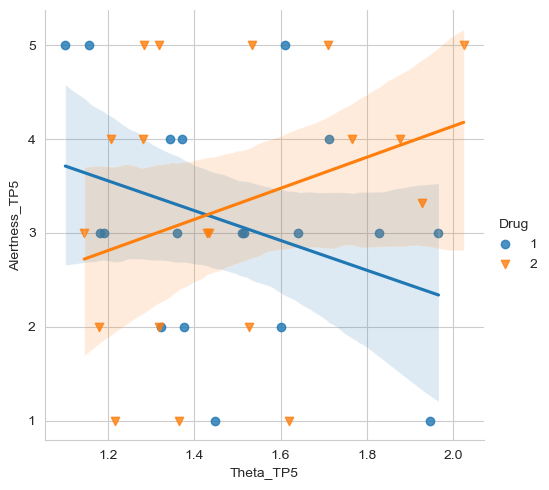

In [363]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Theta_TP5', y ='Alertness_TP5', data = mynewdf_main,  
           hue ='Drug', markers =['o', 'v'])

<Axes: xlabel='Drug', ylabel='Alertness_TP5'>

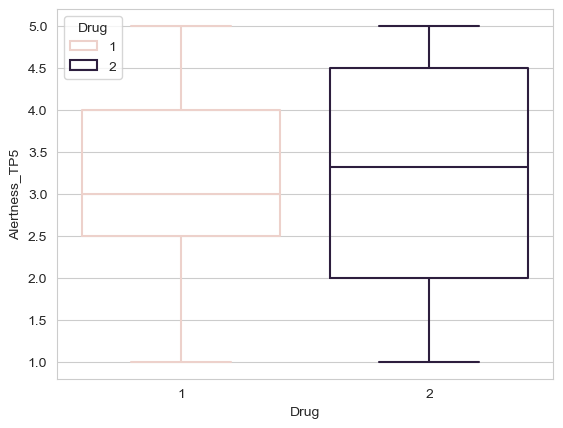

In [364]:
sns.boxplot(data=mynewdf_main, x="Drug", y="Alertness_TP5", hue="Drug", fill=False)

# REGRESSIONS WITH BOTTLE WEIGHT

In [365]:
df_bw = pd.read_csv('myBottleWeight.csv') 
df_bw.head()

,participant,Drug,BottleWeight
0,1,1,0.7600
1,2,1,0.6800
2,3,1,0.5211
3,4,1,0.7200
4,6,1,0.6400


In [366]:
df_bw = df_bw.drop(columns = ['participant', 'Drug'])
df_bw = df_bw.reset_index()
df_bw.head(25)

,index,BottleWeight
0,0,0.7600
1,1,0.6800
2,2,0.5211
3,3,0.7200
4,4,0.6400
5,5,0.7631
6,6,0.3010
7,7,0.7728
8,8,0.7868
9,9,0.7140


In [367]:
mynewdf_main = mynewdf_main.reset_index()
mynewdf_main.head(25)

,index,Alertness_BSL,Alertness_TP1,Alertness_TP2,Alertness_TP3,Alertness_TP4,Alertness_TP5,Alertness_TP6,Excitement_BSL,Excitement_TP1,...,Alpha_TP4,Beta_TP4,Theta_TP4,Alpha_TP5,Beta_TP5,Theta_TP5,Alpha_TP6,Beta_TP6,Theta_TP6,Drug
0,0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,...,2.142114,0.641848,1.372116,2.163950,0.657213,1.371725,2.104528,0.689615,1.182950,1
1,1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,...,2.492098,0.560624,1.541791,2.613451,0.544116,1.510186,2.527657,0.561062,1.553071,1
2,2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,...,1.544127,0.627179,1.524052,2.396986,0.618625,1.189855,2.513749,0.657572,1.055989,1
3,3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,...,1.277307,0.640035,1.850233,1.164420,0.629182,1.947654,1.150032,0.640439,1.905159,1
4,4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.530528,0.696869,1.606460,1.608051,0.698604,1.713256,1.814460,0.683339,1.644718,1
5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.674651,0.755468,1.224348,2.053512,0.705930,1.610545,2.025632,0.707177,1.571005,1
6,6,3.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,4.0,...,2.402474,0.595318,1.456364,2.463640,0.596145,1.448155,2.382404,0.590086,1.642964,1
7,7,3.0,5.0,5.0,5.0,4.0,3.0,2.0,5.0,5.0,...,2.392376,0.599730,1.470762,2.347982,0.592203,1.514711,2.414824,0.581975,1.492547,1
8,8,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,...,2.056075,0.565202,1.968194,2.098555,0.585876,1.966583,2.094881,0.566767,1.963848,1
9,9,3.0,2.0,3.0,3.0,3.0,3.0,2.0,5.0,2.0,...,2.928831,0.633329,1.122462,2.857870,0.627999,1.181246,2.922161,0.616313,1.174086,1


In [368]:
print(df_bw.shape)
print(mynewdf_main.shape)

(38, 2)
(38, 65)


In [369]:
a = list(range(0, 38))
a

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37]

In [370]:
mynewdf_main.index = a

In [371]:
mynewdf_main = mynewdf_main.reset_index()

In [372]:
mynewdf_main = mynewdf_main.drop(columns = ['level_0', 'index'])

In [373]:
mynewdf_main.head(25)

,Alertness_BSL,Alertness_TP1,Alertness_TP2,Alertness_TP3,Alertness_TP4,Alertness_TP5,Alertness_TP6,Excitement_BSL,Excitement_TP1,Excitement_TP2,...,Alpha_TP4,Beta_TP4,Theta_TP4,Alpha_TP5,Beta_TP5,Theta_TP5,Alpha_TP6,Beta_TP6,Theta_TP6,Drug
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,2.142114,0.641848,1.372116,2.163950,0.657213,1.371725,2.104528,0.689615,1.182950,1
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,2.492098,0.560624,1.541791,2.613451,0.544116,1.510186,2.527657,0.561062,1.553071,1
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,1.544127,0.627179,1.524052,2.396986,0.618625,1.189855,2.513749,0.657572,1.055989,1
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,1.277307,0.640035,1.850233,1.164420,0.629182,1.947654,1.150032,0.640439,1.905159,1
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,1.530528,0.696869,1.606460,1.608051,0.698604,1.713256,1.814460,0.683339,1.644718,1
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.674651,0.755468,1.224348,2.053512,0.705930,1.610545,2.025632,0.707177,1.571005,1
6,3.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,4.0,3.0,...,2.402474,0.595318,1.456364,2.463640,0.596145,1.448155,2.382404,0.590086,1.642964,1
7,3.0,5.0,5.0,5.0,4.0,3.0,2.0,5.0,5.0,5.0,...,2.392376,0.599730,1.470762,2.347982,0.592203,1.514711,2.414824,0.581975,1.492547,1
8,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,...,2.056075,0.565202,1.968194,2.098555,0.585876,1.966583,2.094881,0.566767,1.963848,1
9,3.0,2.0,3.0,3.0,3.0,3.0,2.0,5.0,2.0,4.0,...,2.928831,0.633329,1.122462,2.857870,0.627999,1.181246,2.922161,0.616313,1.174086,1


In [374]:
mynewdf_main.reset_index()

,index,Alertness_BSL,Alertness_TP1,Alertness_TP2,Alertness_TP3,Alertness_TP4,Alertness_TP5,Alertness_TP6,Excitement_BSL,Excitement_TP1,...,Alpha_TP4,Beta_TP4,Theta_TP4,Alpha_TP5,Beta_TP5,Theta_TP5,Alpha_TP6,Beta_TP6,Theta_TP6,Drug
0,0,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,1.000000,3.000000,2.000000,...,2.142114,0.641848,1.372116,2.163950,0.657213,1.371725,2.104528,0.689615,1.182950,1
1,1,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,3.000000,...,2.492098,0.560624,1.541791,2.613451,0.544116,1.510186,2.527657,0.561062,1.553071,1
2,2,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,...,1.544127,0.627179,1.524052,2.396986,0.618625,1.189855,2.513749,0.657572,1.055989,1
3,3,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,...,1.277307,0.640035,1.850233,1.164420,0.629182,1.947654,1.150032,0.640439,1.905159,1
4,4,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,1.530528,0.696869,1.606460,1.608051,0.698604,1.713256,1.814460,0.683339,1.644718,1
5,5,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.674651,0.755468,1.224348,2.053512,0.705930,1.610545,2.025632,0.707177,1.571005,1
6,6,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,4.000000,...,2.402474,0.595318,1.456364,2.463640,0.596145,1.448155,2.382404,0.590086,1.642964,1
7,7,3.000000,5.000000,5.000000,5.000000,4.000000,3.000000,2.000000,5.000000,5.000000,...,2.392376,0.599730,1.470762,2.347982,0.592203,1.514711,2.414824,0.581975,1.492547,1
8,8,2.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.056075,0.565202,1.968194,2.098555,0.585876,1.966583,2.094881,0.566767,1.963848,1
9,9,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,2.000000,...,2.928831,0.633329,1.122462,2.857870,0.627999,1.181246,2.922161,0.616313,1.174086,1


In [375]:
df_main_bw = pd.concat([mynewdf_main, df_bw], axis = 1)
df_main_bw.head()

,Alertness_BSL,Alertness_TP1,Alertness_TP2,Alertness_TP3,Alertness_TP4,Alertness_TP5,Alertness_TP6,Excitement_BSL,Excitement_TP1,Excitement_TP2,...,Theta_TP4,Alpha_TP5,Beta_TP5,Theta_TP5,Alpha_TP6,Beta_TP6,Theta_TP6,Drug,index,BottleWeight
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,1.372116,2.163950,0.657213,1.371725,2.104528,0.689615,1.182950,1,0,0.7600
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,1.541791,2.613451,0.544116,1.510186,2.527657,0.561062,1.553071,1,1,0.6800
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,1.524052,2.396986,0.618625,1.189855,2.513749,0.657572,1.055989,1,2,0.5211
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,1.850233,1.164420,0.629182,1.947654,1.150032,0.640439,1.905159,1,3,0.7200
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,1.606460,1.608051,0.698604,1.713256,1.814460,0.683339,1.644718,1,4,0.6400


In [376]:
for c in df_main_bw.columns:
    print(c)

Alertness_BSL
Alertness_TP1
Alertness_TP2
Alertness_TP3
Alertness_TP4
Alertness_TP5
Alertness_TP6
Excitement_BSL
Excitement_TP1
Excitement_TP2
Excitement_TP3
Excitement_TP4
Excitement_TP5
Excitement_TP6
Sociability_BSL
Sociability_TP1
Sociability_TP2
Sociability_TP3
Sociability_TP4
Sociability_TP5
Sociability_TP6
Alpha_beta_BSL
Theta_alpha_BSL
Theta_beta_BSL
Alpha_beta_TP1
Theta_alpha_TP1
Theta_beta_TP1
Alpha_beta_TP2
Theta_alpha_TP2
Theta_beta_TP2
Alpha_beta_TP3
Theta_alpha_TP3
Theta_beta_TP3
Alpha_beta_TP4
Theta_alpha_TP4
Theta_beta_TP4
Alpha_beta_TP5
Theta_alpha_TP5
Theta_beta_TP5
Alpha_beta_TP6
Theta_alpha_TP6
Theta_beta_TP6
Alpha_BSL
Beta_BSL
Theta_BSL
Alpha_TP1
Beta_TP1
Theta_TP1
Alpha_TP2
Beta_TP2
Theta_TP2
Alpha_TP3
Beta_TP3
Theta_TP3
Alpha_TP4
Beta_TP4
Theta_TP4
Alpha_TP5
Beta_TP5
Theta_TP5
Alpha_TP6
Beta_TP6
Theta_TP6
Drug
index
BottleWeight


In [377]:
for tf_measure in ['Theta_', 'Alpha_', 'Beta_', 'Alpha_beta_', 'Theta_alpha_', 'Theta_beta_']:
    for tp in ['1','2','3','4','5','6']:
        eo_main_id = tf_measure + 'TP' + tp
        eo_main_id_bsl = tf_measure + 'BSL'
        
        print('\nBottle Weight and TF measure: ' + eo_main_id)
        print('\n')
        df_temp = df_main_bw[[eo_main_id, eo_main_id_bsl, 'BottleWeight']]
        df_temp = df_temp.dropna()
        lm = pg.linear_regression(df_temp[['BottleWeight', eo_main_id_bsl]], df_temp[eo_main_id])
        print(lm)


Bottle Weight and TF measure: Theta_TP1


          names      coef        se         T          pval        r2  \
0     Intercept  0.250285  0.213433  1.172660  2.493280e-01  0.592617   
1  BottleWeight  0.015521  0.166808  0.093049  9.264277e-01  0.592617   
2     Theta_BSL  0.821424  0.118559  6.928378  6.458103e-08  0.592617   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.567927 -0.183949   0.684518  
1  0.567927 -0.323851   0.354894  
2  0.567927  0.580213   1.062635  

Bottle Weight and TF measure: Theta_TP2


          names      coef        se         T      pval        r2    adj_r2  \
0     Intercept  0.531268  0.212886  2.495547  0.017752  0.512877  0.483354   
1  BottleWeight -0.102187  0.166380 -0.614175  0.543311  0.512877  0.483354   
2     Theta_BSL  0.691618  0.118256  5.848506  0.000002  0.512877  0.483354   

   CI[2.5%]  CI[97.5%]  
0  0.098147   0.964389  
1 -0.440690   0.236316  
2  0.451026   0.932211  

Bottle Weight and TF measure: Theta_TP3


          names      

In [378]:
for tf_measure in ['Theta_', 'Alpha_', 'Beta_', 'Alpha_beta_', 'Theta_alpha_', 'Theta_beta_']:
    for tp in ['1','2','3','4','5','6']:
        eo_main_id = tf_measure + 'TP' + tp
        eo_main_id_bsl = tf_measure + 'BSL'        
        print('\nBottle Weight and TF measure: ' + eo_main_id)
        df_temp = df_main_bw[[eo_main_id, eo_main_id_bsl, 'BottleWeight']]
        df_temp = df_temp.dropna()
        lm = pg.linear_regression(df_temp[['BottleWeight', eo_main_id_bsl]], df_temp[eo_main_id])
        print('p-val of BottleWeight: ' + str(lm['pval'][1]))
        print('p-val of Baseline: ' +str(lm['pval'][2]))        


Bottle Weight and TF measure: Theta_TP1
p-val of BottleWeight: 0.9264276525599351
p-val of Baseline: 6.458102651740357e-08

Bottle Weight and TF measure: Theta_TP2
p-val of BottleWeight: 0.5433110326656831
p-val of Baseline: 1.5070272645905274e-06

Bottle Weight and TF measure: Theta_TP3
p-val of BottleWeight: 0.8337505637030507
p-val of Baseline: 1.1861032942775378e-06

Bottle Weight and TF measure: Theta_TP4
p-val of BottleWeight: 0.6819562188892782
p-val of Baseline: 1.6943041802524954e-06

Bottle Weight and TF measure: Theta_TP5
p-val of BottleWeight: 0.916302605011167
p-val of Baseline: 1.1956292960597844e-05

Bottle Weight and TF measure: Theta_TP6
p-val of BottleWeight: 0.9641382670402421
p-val of Baseline: 0.0026066112838160674

Bottle Weight and TF measure: Alpha_TP1
p-val of BottleWeight: 0.8653105970096269
p-val of Baseline: 1.9009198144819763e-07

Bottle Weight and TF measure: Alpha_TP2
p-val of BottleWeight: 0.3590262731323761
p-val of Baseline: 1.2842865350897286e-05

Bo